In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Load the data
data = pd.read_csv('/content/Data.csv')

In [127]:
data

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Pitchers Average Age,Pitchers City,Pitchers State,...,Gross Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePineFoods,Food,Frozen Momos,Middle,Delhi,Delhi,...,NaN,50.0,5.0,1000.0,1,1.0,75.0,16.00,469.0,3.0
1,1,1,Badlegi Business Ki Tasveer,2,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,Young,Ahmedabad,Gujarat,...,NaN,40.0,15.0,267.0,1,1.0,40.0,50.00,80.0,2.0
2,1,1,Badlegi Business Ki Tasveer,3,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,Young,Delhi,Delhi,...,NaN,25.0,10.0,250.0,1,1.0,25.0,30.00,83.0,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,TagzFoods,Food,Healthy Potato Chips Snacks,Middle,Bangalore,Karnataka,...,48.0,70.0,1.0,7000.0,1,1.0,70.0,2.75,2545.0,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,HeadAndHeart,Education,Brain Development Course,Middle,Patiala,Punjab,...,NaN,50.0,5.0,1000.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2,50,Season Finale With The Sharks,316,MYBYK,Vehicles/Electrical Vehicles,IoT-enabled bikes,Middle,Ahmedabad,Gujarat,...,NaN,200.0,1.0,20000.0,0,NaN,NaN,NaN,NaN,NaN
316,2,51,Gateway To Shark Tank India,317,GODESi,Food,Handmade lollipops,Middle,Bangalore,Karnataka,...,NaN,90.0,0.5,18000.0,1,0.0,NaN,NaN,NaN,NaN
317,2,51,Gateway To Shark Tank India,318,TAC,Beauty/Fashion,"ayurveda co for glowing skin, makeup & open pores",Middle,Mumbai,Maharashtra,...,NaN,150.0,0.5,30000.0,1,1.0,81.0,1.00,8100.0,2.0
318,2,51,Gateway To Shark Tank India,319,Naara-Aaba,Liquor/Beverages,pears and plum wine,Middle,Ziro,Arunachal Pradesh,...,50.0,75.0,2.5,3000.0,1,1.0,50.0,5.00,1000.0,2.0


In [128]:
data.columns

Index(['Season Number', 'Episode Number', 'Episode Title', 'Pitch Number',
       'Startup Name', 'Industry', 'Business Description',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Deal Valuation', 'Number of sharks in deal'],
      dtype='object')

In [129]:
data.isnull().sum()

Season Number                 0
Episode Number                0
Episode Title                 0
Pitch Number                  0
Startup Name                  0
Industry                      0
Business Description          0
Pitchers Average Age          0
Pitchers City                 0
Pitchers State                0
Yearly Revenue              186
Monthly Sales               180
Gross Margin                235
Original Ask Amount           0
Original Offered Equity       0
Valuation Requested           0
Received Offer                0
Accepted Offer              104
Total Deal Amount           144
Total Deal Equity           144
Deal Valuation              144
Number of sharks in deal    144
dtype: int64

In [130]:
mean=data['Monthly Sales'].mean()

In [131]:
data['Monthly Sales'].fillna(mean, inplace=True)

In [132]:
mean1=data['Yearly Revenue'].mean()

In [133]:
data['Yearly Revenue'].fillna(mean1, inplace=True)

In [134]:
data['Monthly Sales'].isnull().sum()

0

In [135]:
data['Yearly Revenue'].isnull().sum()

0

In [136]:
data['Gross Margin'].fillna(data['Gross Margin'].mean(), inplace=True)

In [137]:
data['Gross Margin'].isnull().sum()

0

In [138]:
data['Accepted Offer'].fillna(data['Accepted Offer'].mean(),inplace=True)

In [139]:
data['Total Deal Amount'].fillna(data['Total Deal Amount'].mean(),inplace=True)

In [140]:
data['Total Deal Equity'].fillna(data['Total Deal Equity'].mean(),inplace=True)

In [141]:
data['Deal Valuation'].fillna(data['Deal Valuation'].mean(), inplace=True)

In [142]:
data['Number of sharks in deal'].fillna(data['Number of sharks in deal'].mean(),inplace=True)

In [143]:
data.isnull().sum()

Season Number               0
Episode Number              0
Episode Title               0
Pitch Number                0
Startup Name                0
Industry                    0
Business Description        0
Pitchers Average Age        0
Pitchers City               0
Pitchers State              0
Yearly Revenue              0
Monthly Sales               0
Gross Margin                0
Original Ask Amount         0
Original Offered Equity     0
Valuation Requested         0
Received Offer              0
Accepted Offer              0
Total Deal Amount           0
Total Deal Equity           0
Deal Valuation              0
Number of sharks in deal    0
dtype: int64

In [144]:
data

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Pitchers Average Age,Pitchers City,Pitchers State,...,Gross Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePineFoods,Food,Frozen Momos,Middle,Delhi,Delhi,...,53.494118,50.0,5.0,1000.0,1,1.000000,75.000000,16.000000,469.000000,3.000000
1,1,1,Badlegi Business Ki Tasveer,2,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,Young,Ahmedabad,Gujarat,...,53.494118,40.0,15.0,267.0,1,1.000000,40.000000,50.000000,80.000000,2.000000
2,1,1,Badlegi Business Ki Tasveer,3,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,Young,Delhi,Delhi,...,53.494118,25.0,10.0,250.0,1,1.000000,25.000000,30.000000,83.000000,2.000000
3,1,2,"Insaan, Ideas Aur Sapne",4,TagzFoods,Food,Healthy Potato Chips Snacks,Middle,Bangalore,Karnataka,...,48.000000,70.0,1.0,7000.0,1,1.000000,70.000000,2.750000,2545.000000,1.000000
4,1,2,"Insaan, Ideas Aur Sapne",5,HeadAndHeart,Education,Brain Development Course,Middle,Patiala,Punjab,...,53.494118,50.0,5.0,1000.0,0,0.814815,62.531824,10.169432,1782.786824,2.011364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2,50,Season Finale With The Sharks,316,MYBYK,Vehicles/Electrical Vehicles,IoT-enabled bikes,Middle,Ahmedabad,Gujarat,...,53.494118,200.0,1.0,20000.0,0,0.814815,62.531824,10.169432,1782.786824,2.011364
316,2,51,Gateway To Shark Tank India,317,GODESi,Food,Handmade lollipops,Middle,Bangalore,Karnataka,...,53.494118,90.0,0.5,18000.0,1,0.000000,62.531824,10.169432,1782.786824,2.011364
317,2,51,Gateway To Shark Tank India,318,TAC,Beauty/Fashion,"ayurveda co for glowing skin, makeup & open pores",Middle,Mumbai,Maharashtra,...,53.494118,150.0,0.5,30000.0,1,1.000000,81.000000,1.000000,8100.000000,2.000000
318,2,51,Gateway To Shark Tank India,319,Naara-Aaba,Liquor/Beverages,pears and plum wine,Middle,Ziro,Arunachal Pradesh,...,50.000000,75.0,2.5,3000.0,1,1.000000,50.000000,5.000000,1000.000000,2.000000


In [145]:


# Select the features (X) and target (y) columns
feature_cols = [ 'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Original Ask Amount',
                'Original Offered Equity', 'Valuation Requested', 'Received Offer', 'Deal Valuation', 'Number of sharks in deal']

target_col = 'Accepted Offer'

X = data[feature_cols]
y = data[target_col]




In [146]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the Random Forest classifier
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [148]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.5998799725653217e-06


In [149]:
# Select the columns for comparison
columns_of_interest = ['Yearly Revenue', 'Deal Valuation', ]

# Calculate statistical measures
statistics = data[columns_of_interest].describe()
print(statistics)

       Yearly Revenue  Deal Valuation
count      320.000000      320.000000
mean       355.947761     1782.786824
std        593.326066     2097.544016
min         -1.000000        0.000000
25%        115.750000      764.423077
50%        355.947761     1782.786824
75%        355.947761     1782.786824
max       7200.000000    25000.000000


In [150]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X, y)

# Make predictions on the testing set or new data
y_pred = model.predict(X_test)


In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 9.14816723583937e-32
Mean Absolute Error: 1.6479873021779667e-16
R-squared: 1.0


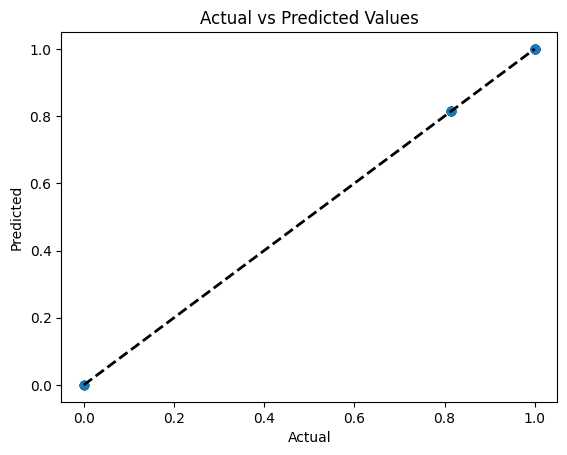

In [152]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


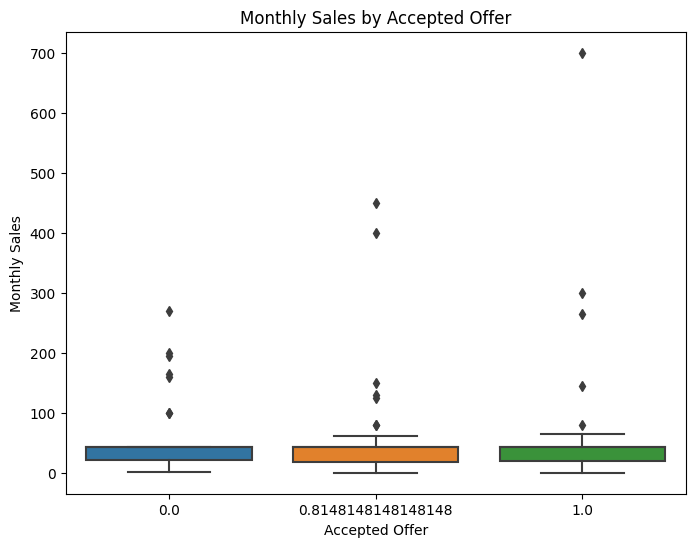

In [153]:
import seaborn as sns

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Accepted Offer', y='Monthly Sales', data=data)
plt.xlabel('Accepted Offer')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales by Accepted Offer')
plt.show()


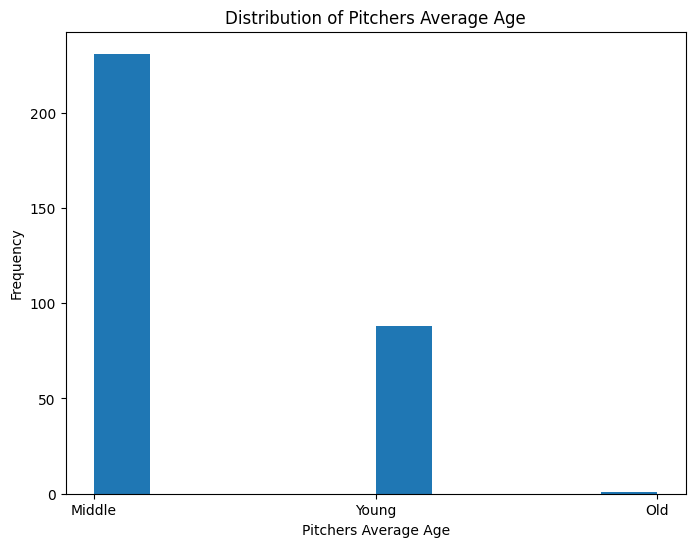

In [154]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Pitchers Average Age'], bins=10)
plt.xlabel('Pitchers Average Age')
plt.ylabel('Frequency')
plt.title('Distribution of Pitchers Average Age')
plt.show()


In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [160]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(y_pred)

Mean Squared Error: 0.0759474508424104
[0.81676268 0.91475493 0.82111387 0.83033516 0.87914075 0.80083725
 0.86878528 0.83194329 0.71543766 0.81541007 0.7753698  0.85639841
 0.82728729 0.84402403 0.78459673 0.6788228  0.81288283 0.8229233
 0.83909514 0.80447428 0.86392568 0.82626372 0.81660193 0.82874554
 0.82864486 0.87504581 0.8096821  0.97764203 0.66793109 0.8117443
 0.83731989 0.82940563 0.73881273 0.78873771 0.81566276 0.85530763
 0.80758304 0.73884986 0.81337209 0.79925876 0.81409266 0.73352699
 0.82933651 0.80643355 0.82670599 0.78696716 0.78092286 0.81005426
 0.75321767 0.80649022 0.8112328  0.83105024 0.80058484 0.91203863
 0.76369136 0.8345476  0.8135854  0.75266519 0.80684891 0.7619107
 0.7669808  0.87083287 0.80181905 0.79901975]


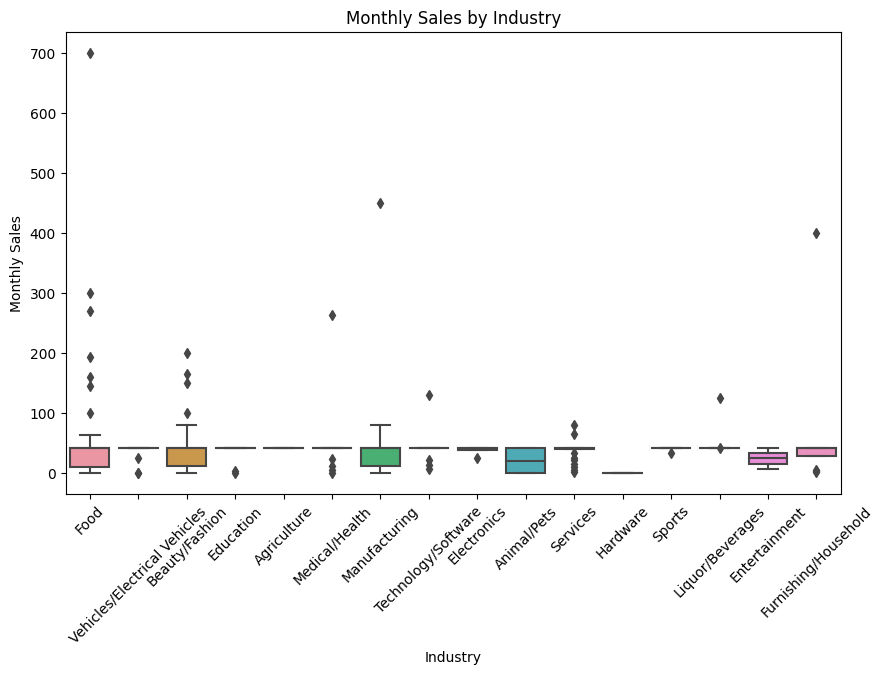

In [161]:
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Monthly Sales', data=data)
plt.xlabel('Industry')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales by Industry')
plt.xticks(rotation=45)
plt.show()


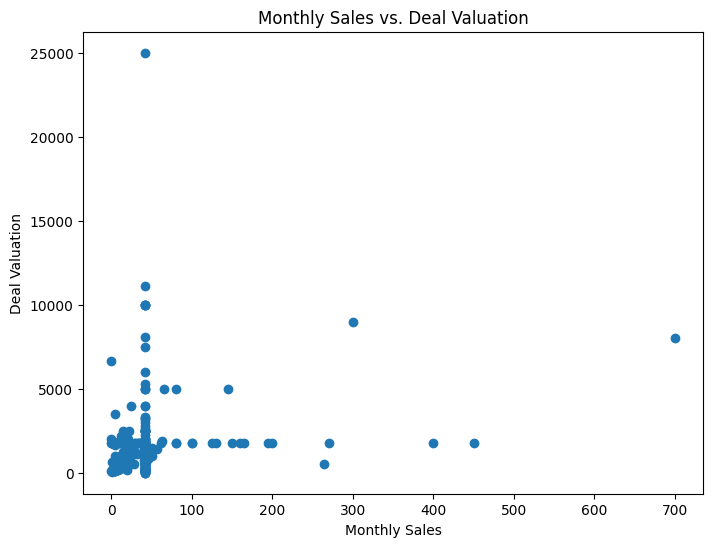

In [162]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Monthly Sales'], data['Deal Valuation'])
plt.xlabel('Monthly Sales')
plt.ylabel('Deal Valuation')
plt.title('Monthly Sales vs. Deal Valuation')
plt.show()
